# Problem Set 02A
Import the libraries to this exercise

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

## Exercise 1, Convolution
Complete the function `convolution` to with a matrix $A \in \mathbb{R}^{m_1\times n_1}$ and a filter $f \in \mathbb{R}^{m_2 \times n_2}$ return a matrix $C \in \mathbb{R}^{m \times n}$ con $m=m_1 - m_2 + 1$ y $n = n_1 - n_2 + 1$
so that $$ C_j = \sum_i p_i f_i $$

We define our function using the methods [shape](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.shape.html), [ones](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ones.html) and sum of numpy, as show below

In [2]:
def convolution(A, f):
    rows = A.shape[0]-f.shape[0]+1
    cols = A.shape[1]-f.shape[1]+1
    r = np.ones((rows,cols))
    if rows<=0 or cols<=0:
        raise ValueError("filter must be smaller than matrix")
    for i in range(rows):
        for j in range(cols):
            sub = A[i:i+f.shape[0],j:j+f.shape[1]]
            v = sub*f
            r[i,j]=r[i,j]*np.sum(v)
    result = r
    return result

And we prove the solution

In [ ]:
A = np.array([[1,2,1,2,1,2],[2,3,2,3,2,3],[4,3,4,3,4,3],[6,4,6,4,6,4],[7,5,7,5,7,5]])
f = np.array([[2,2,2],[2,2,2]])
print (convolution(A,f))

## Exercise 2, Convolution of absolute differences of matrices
Create a function similar to the previous one but where the process be the next 
$$ C_j = \sum_i abs(p_i - f_i)$$

We create a similar funtion to the last one but wue change the operation inside the cycles for a differences absolutes between the elements 

In [3]:
def convolution_sad(A, f):
    rows = A.shape[0]-f.shape[0]+1
    cols = A.shape[1]-f.shape[1]+1
    r = np.ones((rows, cols))
    if rows <= 0 or cols <= 0:
        raise ValueError("filter must be smaller than matrix")
    for i in range(rows):
        for j in range(cols):
            sub = A[i:i+f.shape[0], j:j+f.shape[1]]
            v = abs(sub-f)
            r[i, j] = r[i, j]*abs(np.sum(v))
    result = r
    return result

Now we prove the solution

In [ ]:
A = np.array([[1,2,1,2,1,2],[2,3,2,3,2,3],[4,3,4,3,4,3],[6,4,6,4,6,4],[7,5,7,5,7,5]])
f = np.array([[2,2,2],[2,2,2]])
print (convolution_sad(A,f))

## Exercise 3, Minimum SAD index
If We use the last function in a matrix and a filter with the same number of rows, this one return a vector. Now create a function that return the index of the item with the lowest value.

For this funtion we use the function [min](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.min.html) and [argmin](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.argmin.html) of the numpy library 

In [7]:
def min_sad(A, f):
    c = convolution_sad(A, f)
    if(A.shape[0] == f.shape[0]):
        return np.argmin(c)
    return np.min(c)

And prove the solution

In [8]:
A = np.array([[5,12,1,2,4,6],[6, 5,2,3,2,1]])
f = np.array([[2,2],[2,2]])
print (min_sad(A,f))
A = np.array([[5,11,13,2,4,6],[6,5,2,3,2,11], [6,5,2,3,1,11]])
f = np.array([[2,2],[2,2], [0,1]])
print (min_sad(A,f))

2
3


## Exercise 4, Index to the minimum SAD between matrices
With two matrix A and B create a function to:
* Get a submatrix of A of the size k x k with the upper left element is in the c column and the r row of A
* Do the convolution beetween the previous matrix and the band of B from the r row and the r+k row of B
* get the index of the previous vector with the lowest SAD.

We use the funtion used on the exercise 2 and the function argmin that we see previously

In [9]:
def index_min_sad_in_band(A,B,k,r,c):
    p = A[r:r+k,c:c+k]
    h = B[r:r+k,:]
    c = convolution_sad(h,p)
    return np.argmin(c)

and now we prove the solution 

In [10]:
A = np.array([[1,2,1,2,1,2],[2,3,1,3,2,3],[4,3,4,3,4,3],[6,4,6,4,1,4],[7,5,2,5,7,5]])
B1 = A**2
B2 = 7-A
print (A)
print (B1)
print (B2)
print (index_min_sad_in_band(A,B1,2,2,3))
print (index_min_sad_in_band(A,B2,2,2,3))

[[1 2 1 2 1 2]
 [2 3 1 3 2 3]
 [4 3 4 3 4 3]
 [6 4 6 4 1 4]
 [7 5 2 5 7 5]]
[[ 1  4  1  4  1  4]
 [ 4  9  1  9  4  9]
 [16  9 16  9 16  9]
 [36 16 36 16  1 16]
 [49 25  4 25 49 25]]
[[6 5 6 5 6 5]
 [5 4 6 4 5 4]
 [3 4 3 4 3 4]
 [1 3 1 3 6 3]
 [0 2 5 2 0 2]]
3
1


## Exercise 5, Minimum SAD between images
With two matrix of the same size A and B $\in \mathbb{R}^{m\times n}$ create a function that create a new matrix C 
where:

    C[r,c] = np.abs(index_min_sad_in_band(A,B,k,r,c) - c)

In [11]:
def min_sad_matrix (A, B, k):
    cols = A.shape[1]-k+1
    rows = A.shape[0]-k+1
    r = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            r[i, j] = np.abs(index_min_sad_in_band(A, B, k, i, j) - j)
    return r

We prove the solution

In [13]:
A = np.array([[1,2,1,2,1,2],[2,3,1,3,2,3],[4,3,4,3,4,3],[6,4,6,4,1,4],[7,5,2,5,7,5]])
B1 = A**2
B2 = 7-A
print (min_sad_matrix(A,B1,2))
print (min_sad_matrix(A,B2,2))

[[2. 0. 0. 2. 2.]
 [2. 0. 0. 2. 2.]
 [3. 3. 1. 0. 0.]
 [1. 0. 0. 1. 3.]]
[[0. 1. 2. 3. 4.]
 [3. 1. 1. 3. 1.]
 [4. 2. 2. 2. 4.]
 [1. 1. 1. 2. 2.]]


## Deep maps
We can create a deep map of a image as we show next

In [20]:
def main(a,b):
    #original images
    img_l = io.imread(a)
    img_r = io.imread(b)
    img_l = np.mean(img_l, axis=2)
    img_r = np.mean(img_r, axis=2)
    fig=plt.figure(figsize=(10,20))
    fig.add_subplot(121)
    plt.imshow(img_l, cmap = plt.cm.Greys_r)
    fig.add_subplot(122)
    plt.imshow(img_r, cmap = plt.cm.Greys_r)
    
    #result
    r = min_sad_matrix(img_l, img_r, 10)
    w = np.copy(r)
    w[w>20]=0
    fig2=plt.figure(figsize=(10,3))
    fig2.add_subplot(121)
    plt.imshow(r, cmap = plt.cm.Greys_r)
    fig2.add_subplot(122)
    plt.imshow(w, cmap = plt.cm.Greys_r)

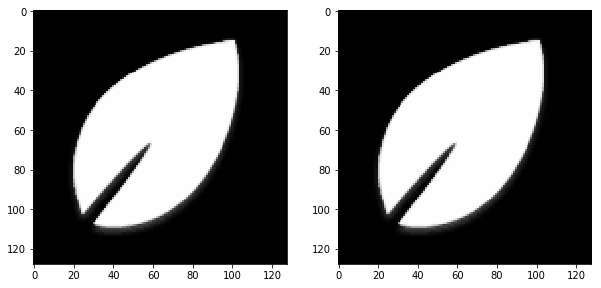

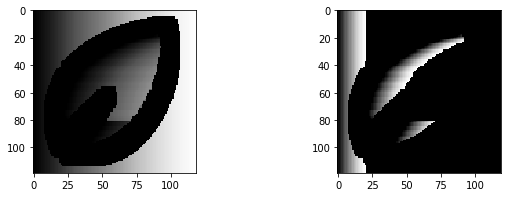

In [21]:
main("leaf-blue.png","leaf-blue.png")

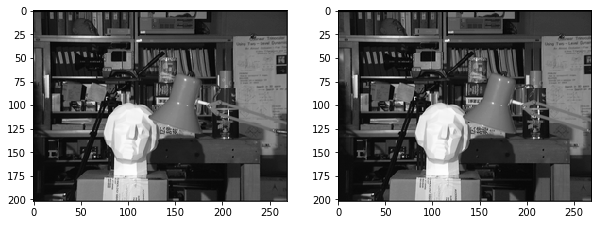

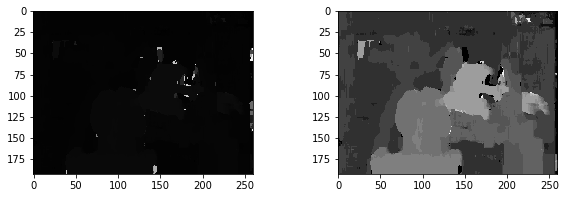

In [22]:
main("office_l.png","office_r.png")

## End
### Thanks